# 🌲 Random Forest Regression

## 📖 What Is Random Forest Regression?

**Random Forest Regression** is an ensemble learning method that fits many decision trees and averages their predictions.

It combines:
- **Bagging (Bootstrap Aggregation)**: Fit each tree on a random subset of the data
- **Random Feature Subsets**: At each split, choose from a random subset of features

---

### ⚙️ Key Features

- Reduces overfitting of single decision trees
- Handles nonlinear relationships well
- Provides built-in **feature importance**

---

### 📊 Key Hyperparameters

| Parameter | Meaning |
|-----------|---------|
| `n_estimators` | Number of trees in the forest |
| `max_depth` | Maximum depth of each tree |
| `max_features` | Number of features considered at each split |

---

## 🧪 Simulated Example

We’ll model:

\[
y = \sin(2\pi x) + \varepsilon
\]

and compare the random forest to a single tree.


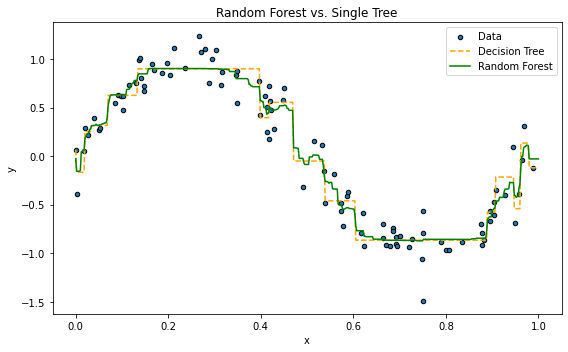

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

# Simulate data
np.random.seed(1)
X = np.sort(np.random.rand(100, 1), axis=0)
y = np.sin(2 * np.pi * X).ravel() + np.random.normal(0, 0.2, size=100)
X_plot = np.linspace(0, 1, 500).reshape(-1, 1)

# Fit Decision Tree and Random Forest
tree = DecisionTreeRegressor(max_depth=4).fit(X, y)
forest = RandomForestRegressor(n_estimators=100, max_depth=4, random_state=1).fit(X, y)

# Predict
y_tree = tree.predict(X_plot)
y_forest = forest.predict(X_plot)

# Plot
plt.figure(figsize=(8, 5))
plt.scatter(X, y, s=20, label='Data', edgecolor='k')
plt.plot(X_plot, y_tree, label='Decision Tree', color='orange', linestyle='--')
plt.plot(X_plot, y_forest, label='Random Forest', color='green')
plt.title("Random Forest vs. Single Tree")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.tight_layout()
plt.show()

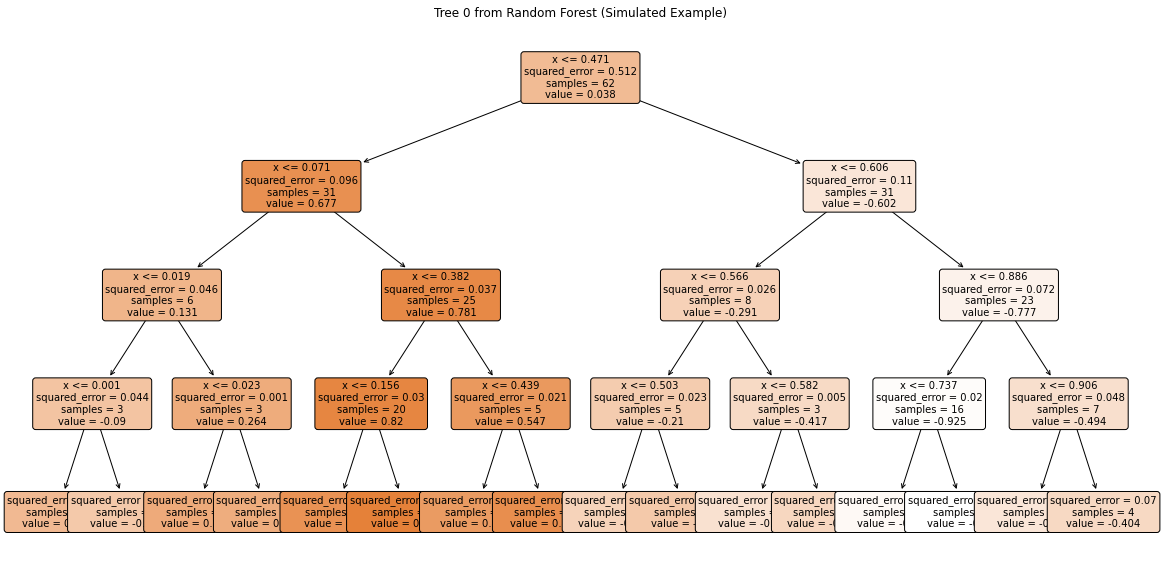

In [5]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Visualize the first tree in the forest (from simulated data)
plt.figure(figsize=(20, 10))
plot_tree(forest.estimators_[0],      # forest = your RandomForestRegressor
          feature_names=["x"],        # Only one feature in simulation
          filled=True,
          rounded=True,
          impurity=True,
          label='all',
          fontsize=10)
plt.title("Tree 0 from Random Forest (Simulated Example)")
plt.show()



## 🏠 Real Data: California Housing

R^2: 0.7669
MSE: 0.3040


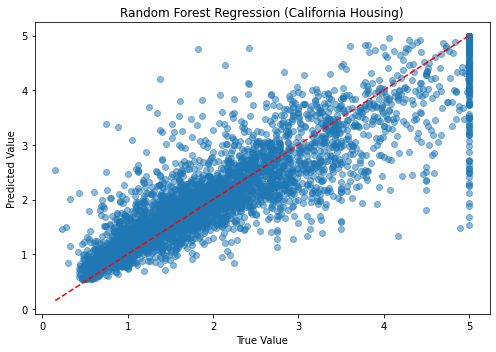

In [6]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns

# Load data
data = fetch_california_housing()
X_real = data.data
y_real = data.target
feature_names = data.feature_names

# Split
X_train, X_test, y_train, y_test = train_test_split(X_real, y_real, test_size=0.2, random_state=0)

# Fit Random Forest
rf = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=0)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

# Evaluate
print(f"R^2: {r2_score(y_test, y_pred):.4f}")
print(f"MSE: {mean_squared_error(y_test, y_pred):.4f}")

# Plot predictions
plt.figure(figsize=(7, 5))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("True Value")
plt.ylabel("Predicted Value")
plt.title("Random Forest Regression (California Housing)")
plt.tight_layout()
plt.show()

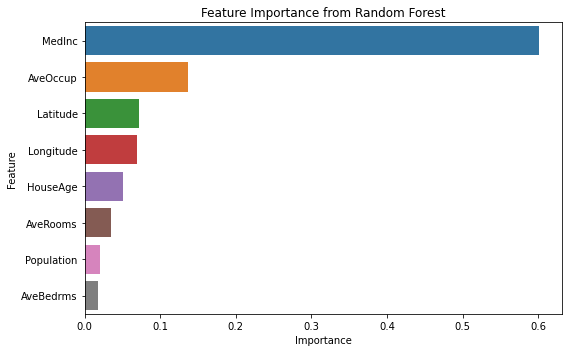

In [7]:
# Plot feature importances
import pandas as pd

importances = rf.feature_importances_
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(8, 5))
sns.barplot(data=importance_df, x='Importance', y='Feature')
plt.title("Feature Importance from Random Forest")
plt.tight_layout()
plt.show()

c:\Users\xiucai admin\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
c:\Users\xiucai admin\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


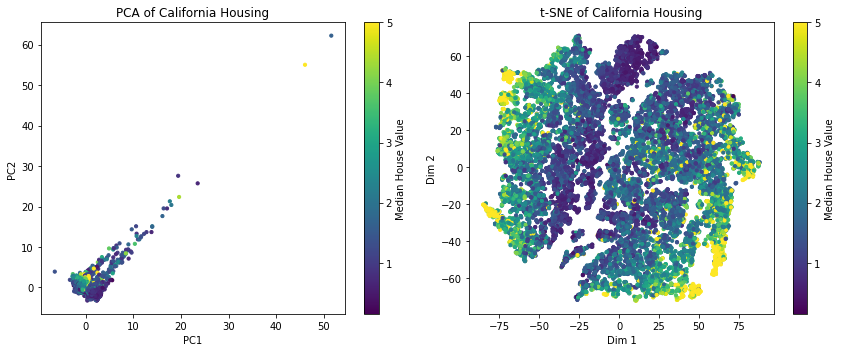

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# Load and scale data
data = fetch_california_housing()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# t-SNE
tsne = TSNE(n_components=2, random_state=0, perplexity=30)
X_tsne = tsne.fit_transform(X_scaled)

# Plot PCA
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', s=10)
plt.colorbar(label="Median House Value")
plt.title("PCA of California Housing")
plt.xlabel("PC1")
plt.ylabel("PC2")

# Plot t-SNE
plt.subplot(1, 2, 2)
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, cmap='viridis', s=10)
plt.colorbar(label="Median House Value")
plt.title("t-SNE of California Housing")
plt.xlabel("Dim 1")
plt.ylabel("Dim 2")

plt.tight_layout()
plt.show()


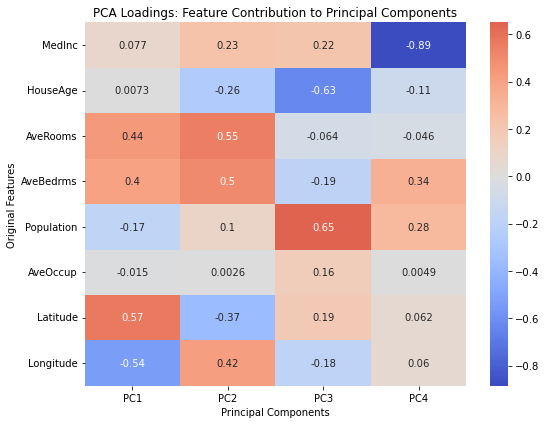

In [9]:
import seaborn as sns

# Fit PCA again for access to components_
pca = PCA(n_components=4)
X_pca = pca.fit_transform(X_scaled)

# Create DataFrame of loadings
loadings = pd.DataFrame(pca.components_.T,
                        columns=[f"PC{i+1}" for i in range(pca.n_components_)],
                        index=data.feature_names)

# Heatmap of feature contributions to each PC
plt.figure(figsize=(8, 6))
sns.heatmap(loadings, annot=True, cmap="coolwarm", center=0)
plt.title("PCA Loadings: Feature Contribution to Principal Components")
plt.ylabel("Original Features")
plt.xlabel("Principal Components")
plt.tight_layout()
plt.show()


Text(0, 0.5, 'PC2')

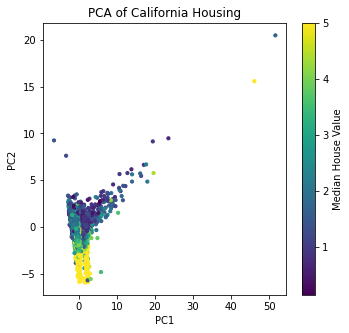

In [12]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(X_pca[:, 0], X_pca[:, 3], c=y, cmap='viridis', s=10)
plt.colorbar(label="Median House Value")
plt.title("PCA of California Housing")
plt.xlabel("PC1")
plt.ylabel("PC2")

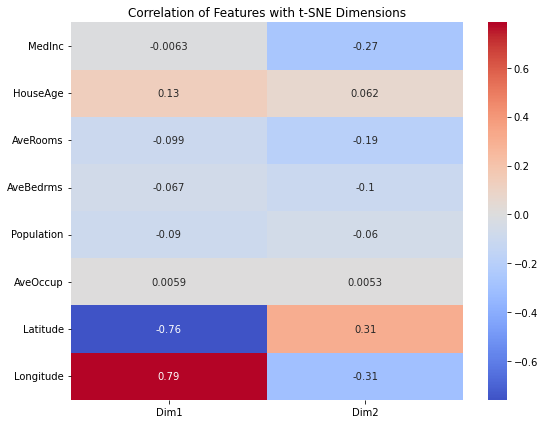

In [13]:
# Correlation of each feature with t-SNE dimensions
tsne_df = pd.DataFrame(X_tsne, columns=["Dim1", "Dim2"])
features_df = pd.DataFrame(X_scaled, columns=data.feature_names)

# Combine for correlation
combined = pd.concat([tsne_df, features_df], axis=1)
correlations = combined.corr().loc[data.feature_names, ["Dim1", "Dim2"]]

# Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlations, annot=True, cmap="coolwarm", center=0)
plt.title("Correlation of Features with t-SNE Dimensions")
plt.tight_layout()
plt.show()
